<a href="https://colab.research.google.com/github/taslimmuhammed/pytorch/blob/main/pytorch_nn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn


In [15]:
n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state=42)
X.shape, y.shape

((1000, 2), (1000,))

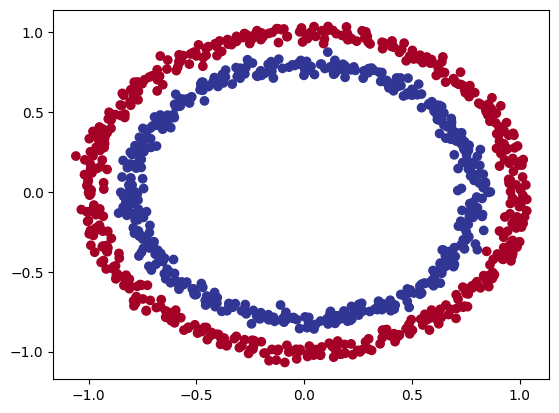

In [16]:
plt.scatter(X[:,0],X[:,1],c = y, cmap=plt.cm.RdYlBu)

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [19]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(5,1)
    ).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [21]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [22]:
y_pred = model_0(X_train)
torch.round(torch.sigmoid(y_pred[:5])),y[:5]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]], device='cuda:0', grad_fn=<RoundBackward0>),
 tensor([1., 1., 1., 1., 0.], device='cuda:0'))

**result array should be single dimension**\
rounding is done to so that\
y>=0.5 => 1\
y <0.5 =>0

In [23]:
epochs = 100

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if(epoch%10)==0:
    print(loss.item())

0.7470587491989136
0.7426461577415466
0.7386622428894043
0.7350608706474304
0.7318011522293091
0.7288472652435303
0.7261670231819153
0.723732590675354
0.7215187549591064
0.7195032835006714


In [24]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("already downloaded")
else:
  request  = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import plot_decision_boundary, plot_predictions

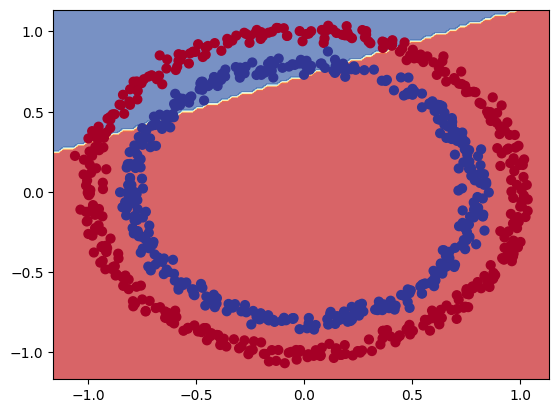

In [25]:
plot_decision_boundary(model_0, X_train, y_train)

# Non Linear Model

In [26]:
model_1 = nn.Sequential(
    nn.Linear(2,10),
    nn.ReLU(),
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Linear(10,1), # output layer cannot be relu
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [27]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(),lr=0.1)

In [28]:
epochs=2000
for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if(epoch%200)==0:
    print(loss.item())

0.6892015933990479
0.6767765879631042
0.6401413679122925
0.4963798522949219
0.21201802790164948
0.07881727814674377
0.0400809645652771
0.02541477233171463
0.01819136179983616
0.014006271958351135


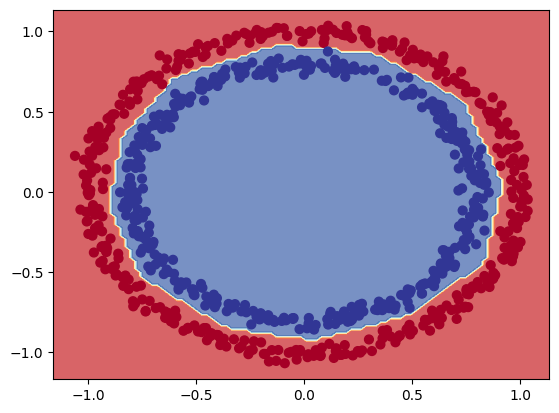

In [29]:
plot_decision_boundary(model_1, X_train, y_train)

# Multi Class Classification

In [30]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X, y = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)
device = "cuda" if torch.cuda.is_available() else "cpu"

X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.LongTensor).to(device)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
X_train[:5], y_train[:5]

(tensor([[ 5.0405,  3.3076],
         [-2.6249,  9.5260],
         [-8.5240, -9.0402],
         [-6.0262, -4.4375],
         [-3.3397,  7.2175]], device='cuda:0'),
 tensor([1, 0, 2, 2, 0], device='cuda:0'))

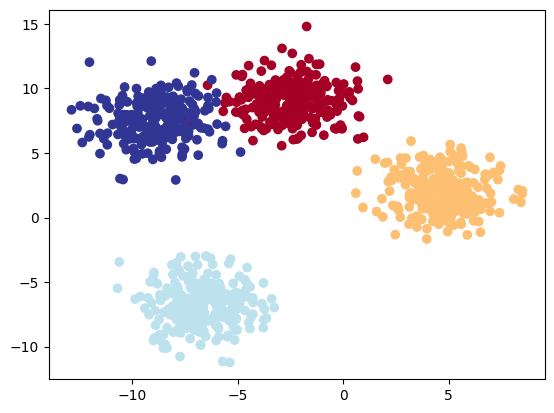

In [31]:
plt.scatter(X[:,0].cpu(),X[:,1].cpu(),c=y.cpu(),cmap=plt.cm.RdYlBu)

In [32]:
model_2 = nn.Sequential(
    nn.Linear(2,10),
    nn.Linear(10,10),
    nn.Linear(10,NUM_CLASSES)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),lr=0.1)
y_logits = model_2(X_test)
y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred

tensor([3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
        0, 3, 1, 3, 3, 3, 3, 3, 0, 1, 0, 0, 0, 3, 3, 0, 3, 3, 1, 0, 3, 3, 3, 3,
        3, 1, 0, 3, 3, 0, 1, 3, 3, 0, 1, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
        1, 3, 0, 1, 3, 1, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 1, 3, 3,
        0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3,
        0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 1, 3, 3, 3, 0, 0, 3, 0, 3,
        0, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3,
        0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 3,
        0, 3, 0, 3, 3, 0, 0, 3], device='cuda:0')

In [33]:
epochs = 1000

for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if(epoch%100)==0:
    print(loss.item())

2.802950143814087
0.03126877173781395
0.026726091280579567
0.025355331599712372
0.02465769834816456
0.02419472299516201
0.0238388329744339
0.023541538044810295
0.023280711844563484
0.023044763132929802


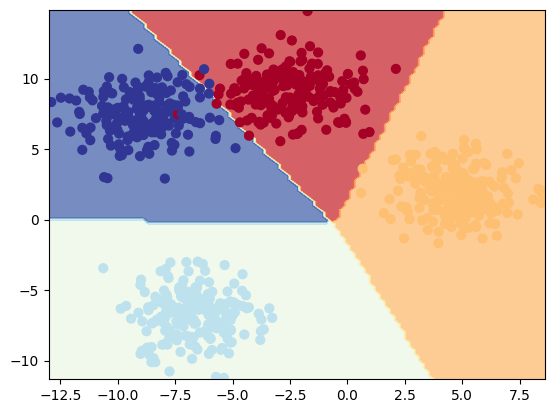

In [35]:
plot_decision_boundary(model_2, X_train, y_train)